In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
train_df = pd.read_csv("/kaggle/input/energy-consumption-dataset-linear-regression/train_energy_data.csv")
test_df = pd.read_csv("/kaggle/input/energy-consumption-dataset-linear-regression/test_energy_data.csv")
df = pd.concat((train_df,test_df))
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [2]:
print(f"Train : {train_df.shape}") 
print(f"Test : {test_df.shape}")
print(f"Train + Test = Data")
print(f"{train_df.shape[0]} + {test_df.shape[0]} = {df.shape[0]}")

Train : (1000, 7)
Test : (100, 7)
Train + Test = Data
1000 + 100 = 1100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 68.8+ KB


In [4]:
print("No of Null Values in Data  ")
print(df.isnull().sum())


No of Null Values in Data  
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64


In [5]:
print("No of Duplicates in  Data : ",df.duplicated().sum())


No of Duplicates in  Data :  0


In [6]:
df['Day of Week'].value_counts()

Day of Week
Weekday    551
Weekend    549
Name: count, dtype: int64

In [7]:
categoric_columns = ['Building Type', 'Day of Week']
numeric_columns = ['Square Footage', 'Number of Occupants', 'Appliances Used',
        'Average Temperature', 'Energy Consumption']

categoric_columns , numeric_columns

(['Building Type', 'Day of Week'],
 ['Square Footage',
  'Number of Occupants',
  'Appliances Used',
  'Average Temperature',
  'Energy Consumption'])

In [8]:
print("No of Unique Values in Data")
for col in categoric_columns:
    print(f"No of Unique Values in {col} : {train_df[col].nunique()}")

No of Unique Values in Data
No of Unique Values in Building Type : 3
No of Unique Values in Day of Week : 2


In [9]:
print("No of Unique Values in Data")
for col in numeric_columns:
    print(f"No of Unique Values in {col} : {train_df[col].nunique()}")

No of Unique Values in Data
No of Unique Values in Square Footage : 986
No of Unique Values in Number of Occupants : 99
No of Unique Values in Appliances Used : 49
No of Unique Values in Average Temperature : 833
No of Unique Values in Energy Consumption : 1000


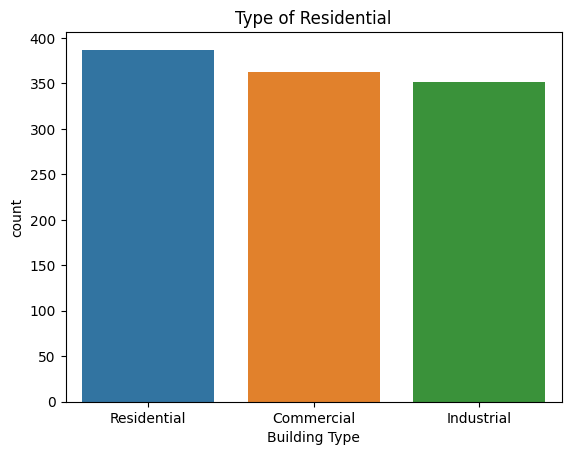

In [10]:
sns.countplot(data =df ,x='Building Type')
plt.title("Type of Residential")
plt.show()

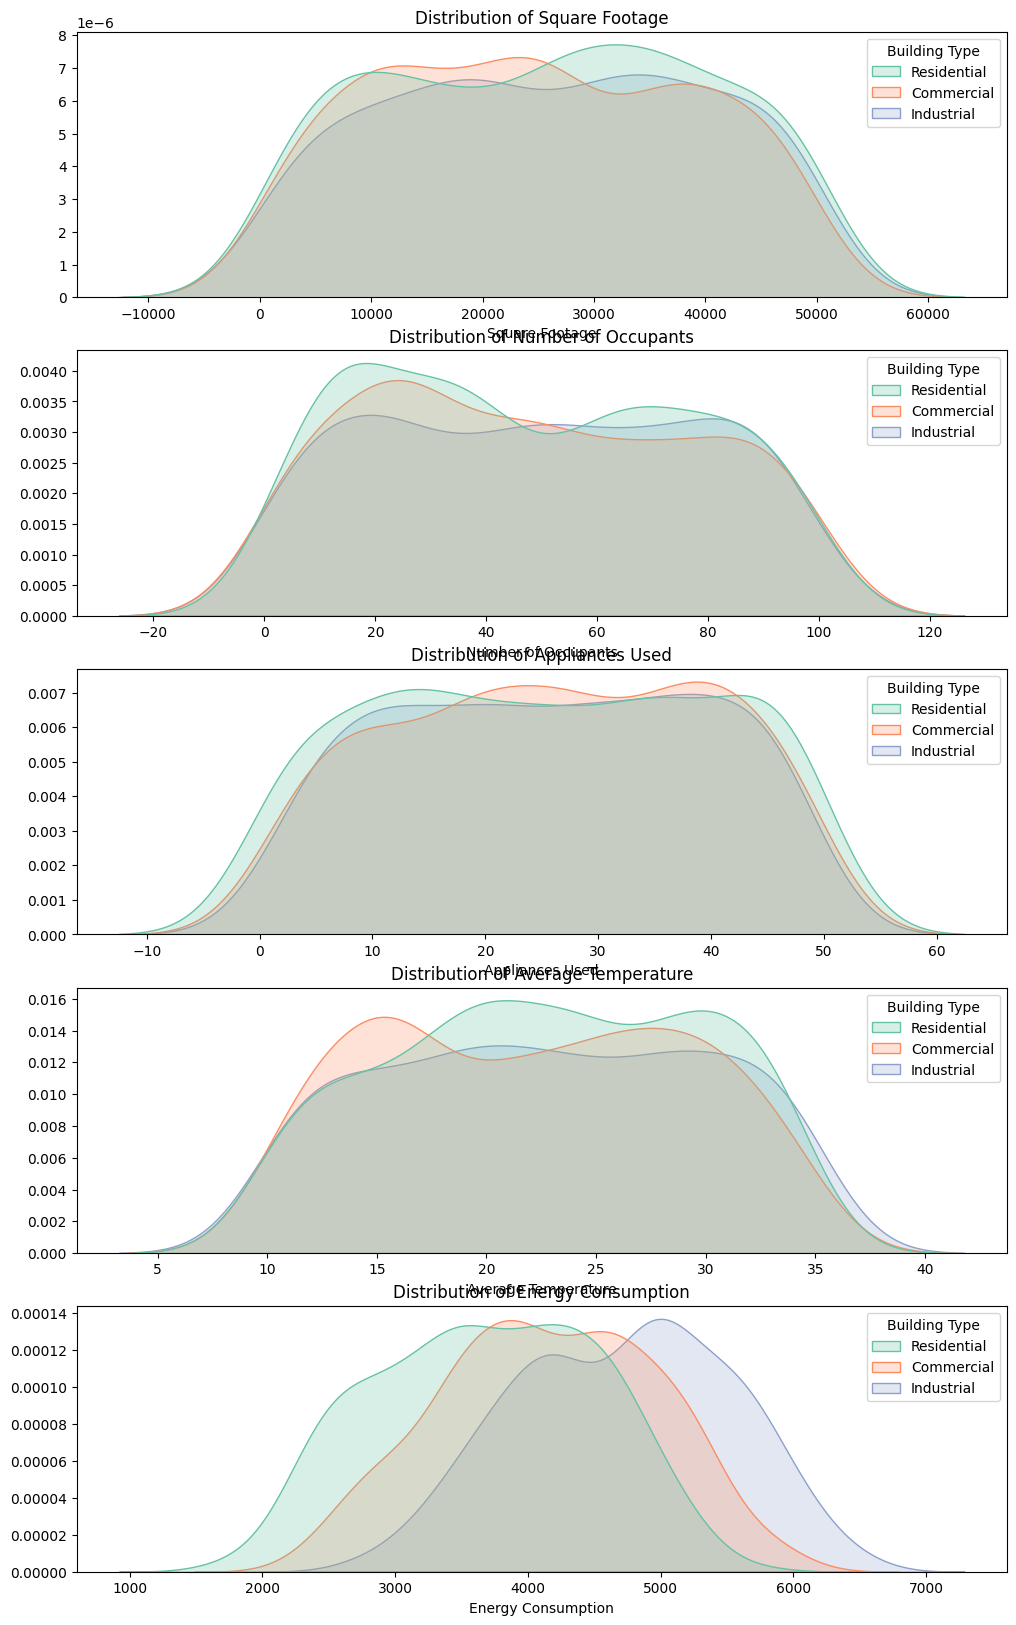

<Figure size 640x480 with 0 Axes>

In [11]:
i = 0
plt.figure(figsize=(12,20))
for col in ['Square Footage', 'Number of Occupants', 'Appliances Used','Average Temperature', 'Energy Consumption']:
    i +=1
    plt.subplot(5,1,i)
    sns.kdeplot(data =df ,x = col ,fill =  True ,hue='Building Type',palette ='Set2')
    plt.xlabel(col)
    plt.ylabel("")
    plt.title(f"Distribution of {col}")
plt.show()
plt.tight_layout()
